# Chapter 4: Training Models

In [1]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

## Two ways to train a linear regression model

- 1. "Closed Form" equation
    - Directly computes the model parameters that best fir the model to the training set
    - aka, parameters that minimize the cost function over the training set

- 2. "Gradient Descent"
    - Iterative optimazation approach
    - Gradually tweaking the parameters to minimize the cost function over the training set
    - Eventually converges to the same set of parameters as the first method

## Linear Regression

## Normal Equation

- Creating linear looking data

In [ ]:
np.random.rand()

In [3]:
# Random X's from 0 to 2
X = 2 * np.random.rand(100, 1)

In [12]:
# Slope is 3
# X intercept is 4
y = 4 + 3 * X + np.random.randn(100, 1)

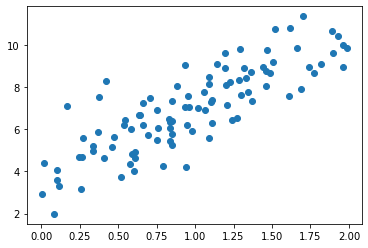

In [13]:
plt.scatter(X, y)

- Goal is to compute the slope, or theta

In [9]:
X_b = np.c_[np.ones((100, 1)), X]

In [10]:
X_b

array([[1.        , 0.40992689],
       [1.        , 0.83689672],
       [1.        , 1.65927697],
       [1.        , 1.50323238],
       [1.        , 0.70735868],
       [1.        , 1.81823999],
       [1.        , 0.10494639],
       [1.        , 1.27281178],
       [1.        , 0.66348491],
       [1.        , 1.19442315],
       [1.        , 1.92886368],
       [1.        , 0.85149813],
       [1.        , 0.93556041],
       [1.        , 0.69672419],
       [1.        , 1.22436916],
       [1.        , 1.68942068],
       [1.        , 0.83052431],
       [1.        , 0.96090549],
       [1.        , 0.46045643],
       [1.        , 0.88329319],
       [1.        , 1.20372872],
       [1.        , 0.47557669],
       [1.        , 0.11445086],
       [1.        , 0.01803212],
       [1.        , 1.24263118],
       [1.        , 1.08866184],
       [1.        , 1.10981166],
       [1.        , 1.33258479],
       [1.        , 1.45800713],
       [1.        , 1.34710249],
       [1.